# Heart failures analysis
Prediction of the presence of a heat diseas in a patient according to its symtoms and biological parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

## Data loading and data exploration
exploring the dataset to get a better understanding of its content.

In [2]:
df = pd.read_csv("../data/heart.csv")
df.dropna()
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


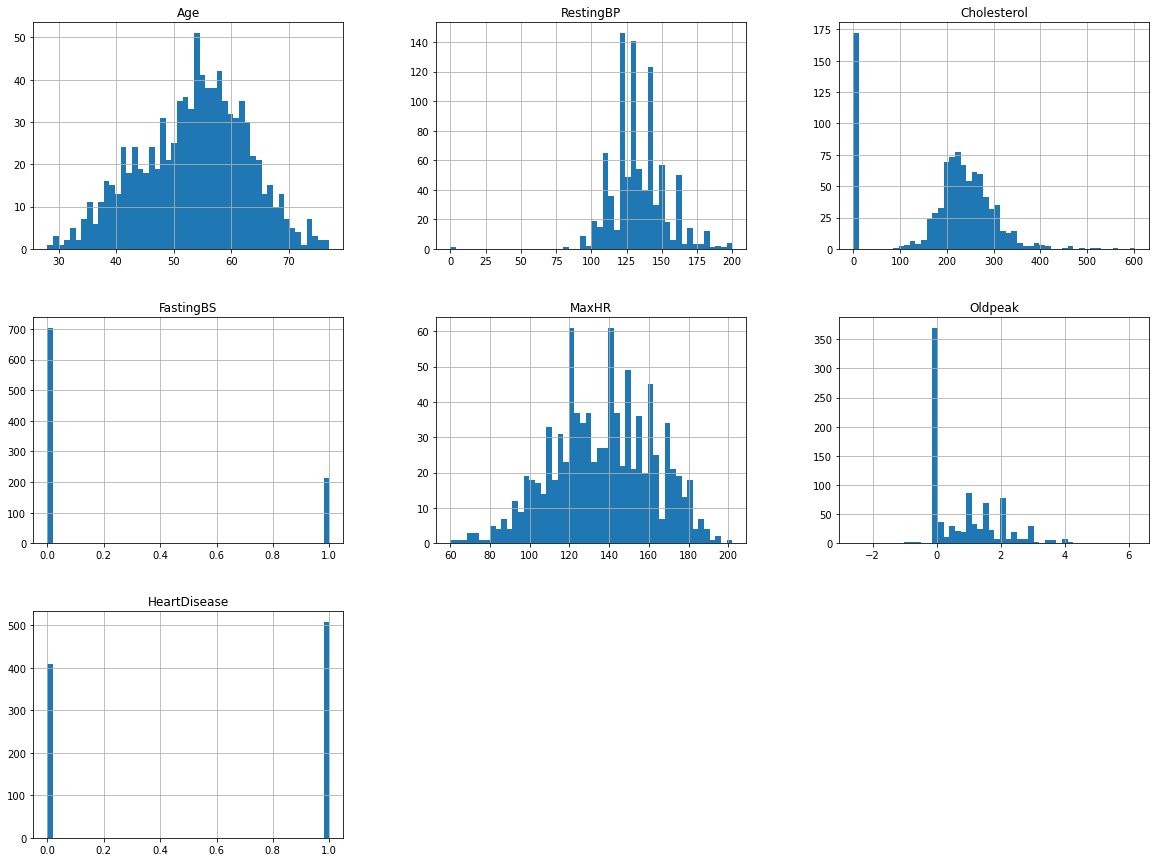

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# input_dict = {"Age" : df['Age'], "RestingBP" : df['RestingBP']}
age_bp_dict = {"Age" : df['Age'], "RestingBP" : df['RestingBP']}
age_bp_df = pd.DataFrame(age_bp_dict)

age_op_dict = {"Age" : df['Age'], "Oldpeak" : df['Oldpeak']}
age_op_df = pd.DataFrame(age_op_dict)

chol_bp_dict = {"Cholesterol" : df['Cholesterol'], "RestingBP" : df['RestingBP']}
chol_bp_df = pd.DataFrame(chol_bp_dict)

hr_bp_dict = {"MaxHR" : df['MaxHR'], "RestingBP" : df['RestingBP']}
hr_bp_df = pd.DataFrame(hr_bp_dict)

hr_op_dict = {"MaxHR" : df['MaxHR'], "Oldpeak" : df['Oldpeak']}
hr_op_df = pd.DataFrame(hr_op_dict)

bp_op_dict = {"RestingBP" : df['RestingBP'], "Oldpeak" : df['Oldpeak']}
bp_op_df = pd.DataFrame(bp_op_dict)

hr_chol_dict = {"Max_HR" : df['MaxHR'], "Cholesterol" : df['Cholesterol']}
hr_chol_df = pd.DataFrame(hr_chol_dict)

hr_age_dict = {"Max_HR" : df['MaxHR'], "Age" : df['Age']}
hr_age_df = pd.DataFrame(hr_age_dict)

disease_dict = {"HeartDisease" : df['HeartDisease']}
disease_df = pd.DataFrame(disease_dict)

# Part1: Bayesian classification
In this part, the gaussian bayesian classifier is used to get some metrics of different columns of the dataset to know if they allow to detect a heart disease.

In [7]:
def gaussian_bayes(input_df):
    X_train, X_test, y_train, y_test = train_test_split(input_df, disease_df, test_size=0.20, random_state=42)
    gnb = GaussianNB()
    history = gnb.fit(X_train, np.ravel(y_train))
    y_pred = history.predict(X_test)
    print(input_df.columns[0] + " and " + input_df.columns[1])
    print("normalized accuracy score = " + str(accuracy_score(y_test, y_pred)))
    print("accuracy score = " + str(accuracy_score(y_test, y_pred, normalize=False)))
    print("precision score = " + str(precision_score(y_test, y_pred, average='macro', zero_division=True)))


In [8]:
gaussian_bayes(age_bp_df)

Age and RestingBP
normalized accuracy score = 0.5706521739130435
accuracy score = 105
precision score = 0.5596274794388002


In [9]:
gaussian_bayes(chol_bp_df)

Cholesterol and RestingBP
normalized accuracy score = 0.6086956521739131
accuracy score = 112
precision score = 0.6492194674012857


In [10]:
gaussian_bayes(hr_bp_df)

MaxHR and RestingBP
normalized accuracy score = 0.657608695652174
accuracy score = 121
precision score = 0.6529425723777884


In [11]:
gaussian_bayes(hr_chol_df)

Max_HR and Cholesterol
normalized accuracy score = 0.657608695652174
accuracy score = 121
precision score = 0.6614583333333333


In [12]:
gaussian_bayes(hr_age_df)

Max_HR and Age
normalized accuracy score = 0.657608695652174
accuracy score = 121
precision score = 0.6505260640841702


In [13]:
gaussian_bayes(age_op_df)

Age and Oldpeak
normalized accuracy score = 0.6956521739130435
accuracy score = 128
precision score = 0.7083782811938151


In [14]:
gaussian_bayes(hr_op_df)

MaxHR and Oldpeak
normalized accuracy score = 0.6956521739130435
accuracy score = 128
precision score = 0.6931992903607332


In [15]:
gaussian_bayes(bp_op_df)

RestingBP and Oldpeak
normalized accuracy score = 0.625
accuracy score = 115
precision score = 0.6532581453634085


Now that multiple combination have been tried, the gaussian bayes classifier shows that the data that offer the best correlation to detecte heart disease are the Age and the oldpeak.

# Part 3: Supervised learning, generalisation and overfitting

In [16]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
number_df = df.select_dtypes(['number']).copy()
number_df.drop('HeartDisease', inplace = True, axis=1)
number_df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


## Comparing results of decision trees with differents datasets
Obtaning metrics from decision trees trained with dataset obtained with the train_test_split() and with KFold to compare them.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(number_df, disease_df, test_size=0.20, random_state=42)
clf = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=3, min_samples_leaf=5).fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[0.85714286 0.82312925 0.78231293 0.74829932 0.78082192]


In [19]:

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(number_df)

print(kf)

for train_index, test_index in kf.split(number_df):
    X_train_fold, X_test_fold = number_df.iloc[train_index, :], number_df.iloc[test_index, :]
    y_train_fold, y_test_fold = disease_df.iloc[train_index, :], disease_df.iloc[test_index, :]


KFold(n_splits=10, random_state=42, shuffle=True)


In [20]:
clf_fold = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=3, min_samples_leaf=5).fit(X_train_fold, y_train_fold)

### Plot decision trees 

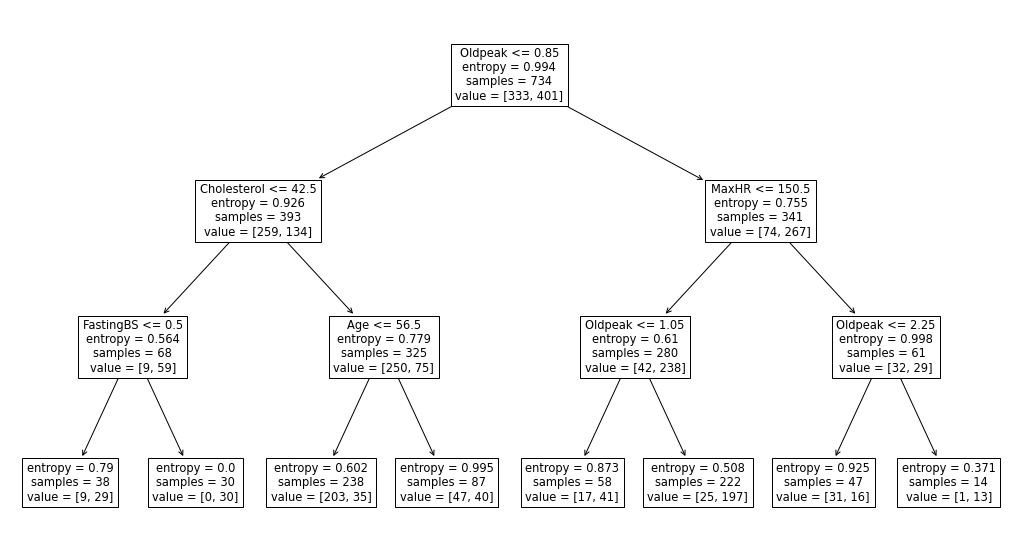

In [21]:
plt.figure(figsize=(18,10))
tree.plot_tree(clf, feature_names=("Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"))
plt.show()

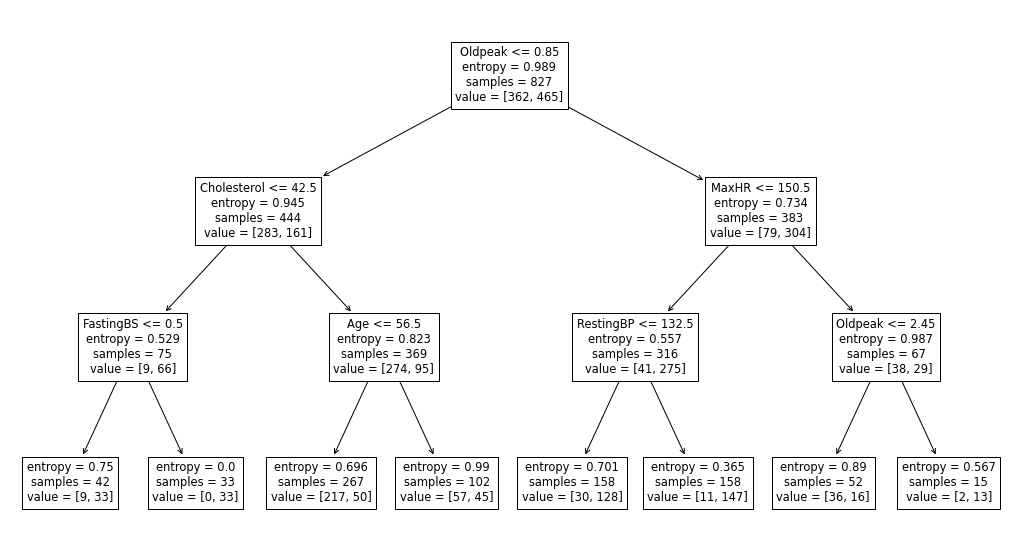

In [22]:
plt.figure(figsize=(18,10))
tree.plot_tree(clf_fold, feature_names=("Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"))
plt.show()

### Print metrics

In [23]:
def print_metrics(prediction, y_test):
    print("normalized accuracy score = " + str(accuracy_score(y_test, prediction)))
    print("precision score = " + str(precision_score(y_test, prediction, average='macro', zero_division=True)))
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    tn = tn * 100 / y_test.size
    fp = fp * 100 / y_test.size
    fn = fn * 100 / y_test.size
    tp = tp * 100 / y_test.size
    print("true negative = " + str(tn) + "%, false positive = " + str(fp) + "%, false negative = " + str(fn) + "%, true positive = " + str(tp) + "%")
    print("recall score = " + str(recall_score(y_test, prediction)))
    print("f1 score = " + str(f1_score(y_test, prediction)))

In [24]:
prediction = clf.predict(X_test)

print_metrics(prediction, y_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

normalized accuracy score = 0.7663043478260869
precision score = 0.7682033096926714
true negative = 34.78260869565217%, false positive = 7.065217391304348%, false negative = 16.304347826086957%, true positive = 41.84782608695652%
recall score = 0.719626168224299
f1 score = 0.7817258883248731


In [25]:
prediction = clf_fold.predict(X_test_fold)

print_metrics(prediction, y_test_fold)
y_pred_proba_fold = clf_fold.predict_proba(X_test_fold)[:, 1]


normalized accuracy score = 0.7582417582417582
precision score = 0.7579710144927536
true negative = 39.56043956043956%, false positive = 13.186813186813186%, false negative = 10.989010989010989%, true positive = 36.26373626373626%
recall score = 0.7674418604651163
f1 score = 0.7499999999999999


### Plot the ROC curves

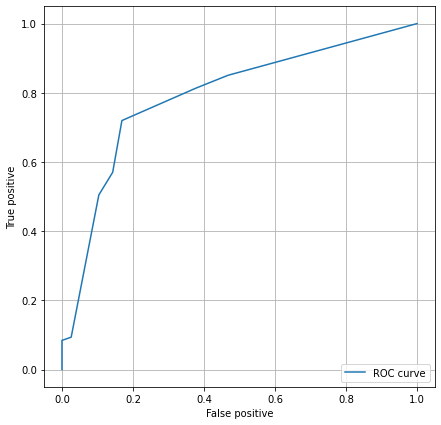

In [26]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(7, 7))
plt.plot(fpr,tpr,label="ROC curve")
plt.ylabel("True positive")
plt.xlabel("False positive")
plt.legend(loc=4)
plt.grid(True)
plt.show()

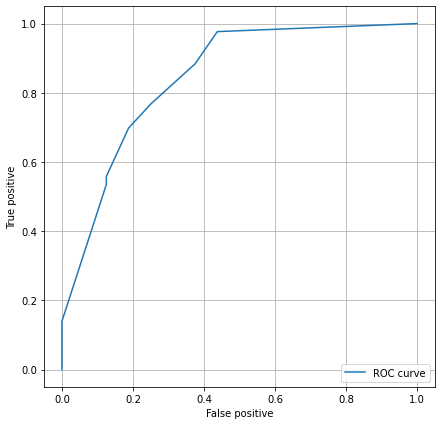

In [27]:
y_pred_proba = clf_fold.predict_proba(X_test_fold)[::,1]
fpr_fold, tpr_fold, _ = metrics.roc_curve(y_test_fold,  y_pred_proba_fold)
auc = metrics.roc_auc_score(y_test_fold, y_pred_proba_fold)
plt.figure(figsize=(7, 7))
plt.plot(fpr_fold,tpr_fold,label="ROC curve")
plt.ylabel("True positive")
plt.xlabel("False positive")
plt.legend(loc=4)
plt.grid(True)
plt.show()

Pinting the metrics and ploting the ROC curve shows a little difference between the classic dataset and the dataset obtained with 10 folds.
Indeed, the differents metrics printed above tends to show that both datasets offers great performance in heart disease detection.
Those great performance allows to conclude that the decision trees generalize well to new data.

## Experimenting decision trees parameters

In [28]:
experiment_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=3, min_samples_leaf=75, splitter="best").fit(X_train, y_train)

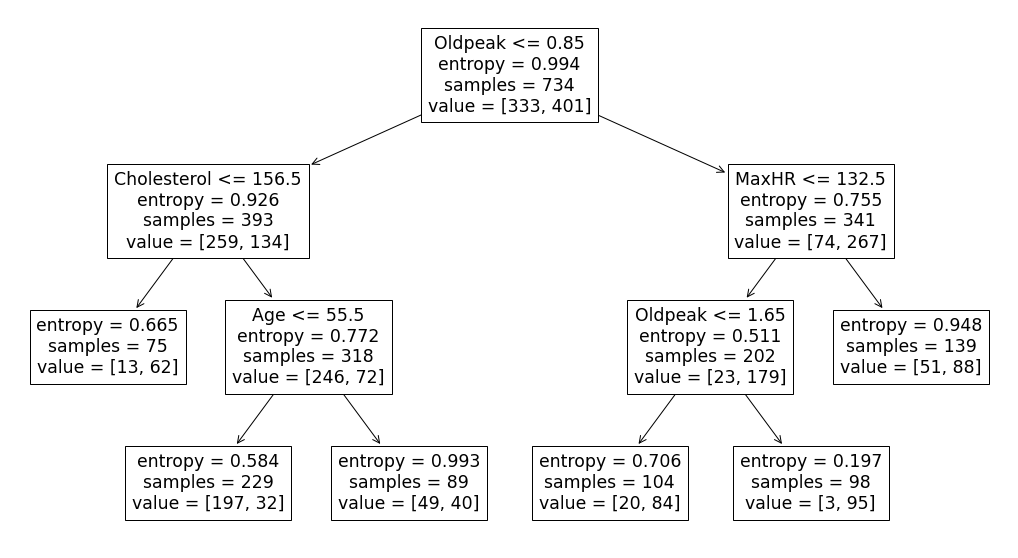

In [29]:
plt.figure(figsize=(18,10))
tree.plot_tree(experiment_clf, feature_names=("Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"))
plt.show()

In [30]:
prediction = experiment_clf.predict(X_test)

print_metrics(prediction, y_test)
y_pred_proba = experiment_clf.predict_proba(X_test)[:, 1]
print("roc auc score = " + str(roc_auc_score(y_test, y_pred_proba)))

normalized accuracy score = 0.7228260869565217
precision score = 0.7154088050314465
true negative = 28.26086956521739%, false positive = 13.58695652173913%, false negative = 14.130434782608695%, true positive = 44.02173913043478%
recall score = 0.7570093457943925
f1 score = 0.76056338028169
roc auc score = 0.7408059230489137


### Experiment conclusion
Experimenting multiple values for the depth of the decision trees shows that a depth within 2 and 4 offer approximatively the same performance, but beyond 4, the performance of the decision tree is only decreasing.
Experimenting different split node strategies shows that the "best" split strategy gives better performance than the "random" split strategy. Changing minimum sample split is decreasing the performance only with high number, performance are not influenced bellow 500.
Experimenting multiple value for the minimum smaple leaf show that the performance start decreasing for a number superior to ~75.

## Changing training/test rates

In [31]:
# 30% of 80% = 24% --> 20 + 24 = 44
X_train, X_test, y_train, y_test = train_test_split(number_df, disease_df, test_size=0.44, random_state=42)
clf_44 = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=3, min_samples_leaf=5).fit(X_train, y_train)
prediction = clf_44.predict(X_test)
print_metrics(prediction, y_test)
y_pred_proba = experiment_clf.predict_proba(X_test)[:, 1]
print("roc auc score = " + str(roc_auc_score(y_test, y_pred_proba)))

normalized accuracy score = 0.806930693069307
precision score = 0.8052858683926645
true negative = 35.396039603960396%, false positive = 5.693069306930693%, false negative = 13.613861386138614%, true positive = 45.2970297029703%
recall score = 0.7689075630252101
f1 score = 0.8243243243243242
roc auc score = 0.8205173635719348


In [32]:
# 60% of 80% = 48% --> 20 + 48 = 68
X_train, X_test, y_train, y_test = train_test_split(number_df, disease_df, test_size=0.68, random_state=42)
clf_68 = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth=3, min_samples_leaf=5).fit(X_train, y_train)
prediction = clf_68.predict(X_test)
print_metrics(prediction, y_test)
y_pred_proba = experiment_clf.predict_proba(X_test)[:, 1]
print("roc auc score = " + str(roc_auc_score(y_test, y_pred_proba)))

normalized accuracy score = 0.7328
precision score = 0.7592373791621911
true negative = 38.72%, false positive = 4.64%, false negative = 22.08%, true positive = 34.56%
recall score = 0.6101694915254238
f1 score = 0.7212020033388982
roc auc score = 0.8280692976421289


## Conclusion
Experimenting different size of training and testing sets shows that the performance are decreasing a little when the testing set get bigger than the training set, this is due to the fact that the classifier do not train on enought data to obtain an optimale generalization. Indeed the performance are not decreasing a lot, so this dataset seems to be able to obtain a good generalization even with a limited training dataset.

# Part 4: Neural networks

In [33]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.neural_network import MLPClassifier

We keep only the numerical data to train the neural network

In [34]:
number_df = df.select_dtypes(['number']).copy()
number_df.drop('FastingBS', inplace = True, axis=1)
number_df.drop('HeartDisease', inplace = True, axis=1)
number_df.head(5)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


## Linear regression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(number_df, disease_df, test_size=0.20, random_state=42)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(number_df)

for train_index, test_index in kf.split(number_df):
    X_train_fold, X_test_fold = number_df.iloc[train_index, :], number_df.iloc[test_index, :]
    y_train_fold, y_test_fold = disease_df.iloc[train_index, :], disease_df.iloc[test_index, :]

In [36]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
reg_fold = linear_model.LinearRegression().fit(X_train_fold, y_train_fold)
prediction = reg.predict(X_test)
prediction_fold = reg_fold.predict(X_test_fold)

In [37]:
print("R2 score = " + str(r2_score(y_test, prediction)))
print("explained_variance_score = " + str(explained_variance_score(y_test, prediction)))


R2 score = 0.1992849854101466
explained_variance_score = 0.21843869129206805


In [38]:
print("R2 score = " + str(r2_score(y_test_fold, prediction_fold)))
print("explained_variance_score = " + str(explained_variance_score(y_test_fold, prediction_fold)))

R2 score = 0.28345137895850403
explained_variance_score = 0.32380115937181486


The metrics show that this dataset is not linearly separable.

## Multilayer Perceptron

In [39]:
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import backend as K
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'


2022-11-12 20:37:11.739239: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [40]:
optimizer = keras.optimizers.Adam(lr=0.01)

model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))


model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

2022-11-12 20:37:12.590866: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-12 20:37:12.591629: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-12 20:37:12.628086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 20:37:12.628218: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 312.97GiB/s
2022-11-12 20:37:12.628239: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-12 20:37:12.629156: I tensorflow/stream_executor/

Epoch 1/100


2022-11-12 20:37:13.831402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


23/23 [==============================] - 1s 14ms/step - loss: 7.9833 - accuracy: 0.5319 - val_loss: 0.9674 - val_accuracy: 0.5380
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.5416 - val_loss: 0.5683 - val_accuracy: 0.7174
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.6896 - val_loss: 0.7609 - val_accuracy: 0.5815
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.6591 - val_loss: 0.5749 - val_accuracy: 0.7283
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5739 - accuracy: 0.7201 - val_loss: 0.5744 - val_accuracy: 0.6957
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6782 - val_loss: 0.5702 - val_accuracy: 0.7283
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7369 - val_loss: 0.6130 - val_accuracy: 0.6630
Epoch 8/100
23/23 [=====

### Experiment conclusion
A higher number of layers allows the recognition of higher level patterns and a better generalization. For this dataset, the best performance is btained with a neural network with 3 hidden layers with 20 neurones each.

The model get its optmal weight fast.

Concerning the learning rate, the model obtains it's best performance faster with a value between 0.01 and 0.001, a higher or a lower value will decrease the performance.